We generally start our code by importing the libraries which we will throughoutt the programme

In [28]:
import numpy as np
import pandas as pd
import sklearn

how we will load the data that we will be using in our train model.Here we are using boston house pricing dataset which is available in the sklearn library itself.

In [29]:
from sklearn.datasets import load_boston
df=load_boston()

In [6]:
df

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [7]:
type(df)

sklearn.utils.Bunch

In [4]:
df.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [8]:
print(df.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [9]:
print(df.filename)

/usr/local/lib/python3.7/dist-packages/sklearn/datasets/data/boston_house_prices.csv


In [15]:
print(df.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [11]:
print(df.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
print(df.data)

we convert our datasets into the pandas dataframes,so that is easier to analyse the data

In [ ]:
boston=pd.DataFrame(df.data,columns=df.feature_names)
boston.head(20)

Add a new column of tartget values of the dataframe

In [14]:
boston['MEDV']=df.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Check if the dataset contains any null value or not

In [16]:
boston.isnull()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


isnull return True or False for each of the cell in the dataframe,but we cant go exploring the cells to look for True values if any,so we use sum() function to count all the cells with True value(i.e., Null Cells)

In [17]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

We never Train the model on all the data that we have,we always make sure to atleast have a test dataset,which is different from the training dataset.

In [23]:
from sklearn.model_selection import train_test_split
X=boston.drop('MEDV',axis=1)
Y=boston['MEDV']
X_train,X_test,Y_train,Y_test=train_test_split(X ,Y , test_size=0.15,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(430, 13)
(76, 13)
(430,)
(76,)


In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## SPLITTING THE DATASET INTO THE TRAIN AND TEST SET TO MAKE SURE THE
 
##X=boston.drop('MEDV',axis=1)

##X_train,X_test,Y_train,Y_test=train_test_split(X ,Y , test_size=0.15,random_state=5)

In [34]:
## FITTING MODEL ON THE TRAINING DATASET
lin_model=LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
##y=boston.drop('MEDV',AXIS=1)
y_train_predict=lin_model.predict(X_train)
rmse=(np.sqrt(mean_squared_error(Y_train,y_train_predict)))

print("the model performance for training set")
print('RMSE is{} '.format(rmse))
print("\n")


##on testing set
y_test_predict=lin_model.predict(X_test)
rmse=(np.sqrt(mean_squared_error(Y_train,y_train_predict)))

print("the model performance for training set")
print('RMSE is{} '.format(rmse))

the model performance for training set
RMSE is4.710901797319796 


the model performance for training set
RMSE is4.710901797319796 


Text(0, 0.5, 'predicted')

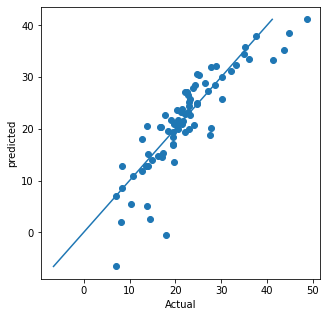

In [47]:
#MATPLOTLIB IS A LIBRARY TO PLOT THE CURVES
#PART OF DATA VISUALIZATION

import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.scatter(Y_test,y_test_predict)
plt.plot([min(y_test_predict),max(y_test_predict)],[min(y_test_predict),max(y_test_predict)])
plt.xlabel('Actual')
plt.ylabel('predicted')